## Multi pendulum tutorial
---

### Initial setup

Some initial imports to get output looking right in the notebook.

In [1]:
# only really needed for pretty printing
import sympy as sp

# for setting times, initial conditions
import numpy as np

# pretty printing of mathematical expressions
sp.init_printing()

# to display animations
from IPython.display import HTML

# to display plots in the notebook
%matplotlib inline

Import the multipendulum module.

In [2]:
import multipendulum as mp

---

### Create and configure a MultiPendulum object

Nearly all of the work is done (for now) by the `MultiPendulum` object. In the near future, plots and other diagnostics will likely be moved out.

When you create a `MultiPendulum`, you need to tell it how many segments it has. 

In [3]:
double = mp.MultiPendulum(2)

You can set the lengths of the segments, or the masses, or both. By default, the lengths are each $1/n$ (for $n$ segments) and the masses are each 1.

In [4]:
double.set_lengths((0.4, 0.6))
double.set_masses((1.5, 3.0))

With the lengths and masses set, you can look at the (squared, angular) linear eigenfrequencies

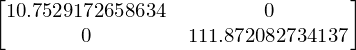

In [5]:
double.D

... and the (non normalized) linear eigenmodes

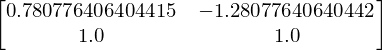

In [6]:
double.S

If you change the lengths or masses, the eigenmodes and eigenfrequencies are recalculated.

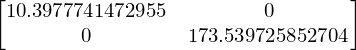

In [7]:
double.set_lengths((0.2, 0.8))
double.D

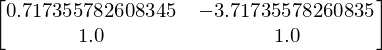

In [8]:
double.S

---
### Integrating

For time integration, the procedure is:
1. set initial conditions
2. set the times for integration
3. perform the integration

#### Initial conditions

Initial conditions are specified via the `set_initial_conditions` method.

In [9]:
help(mp.MultiPendulum.set_initial_conditions)

Help on function set_initial_conditions in module multipendulum.multipendulum:

set_initial_conditions(self, theta_0, omega_0, degrees=True, eigenmodes=False)
    Set initial conditions.
    
    Parameters
    ----------
    theta_0: float or iterable of floats
        contains inital position amplitudes. Should either be a single value or
        a tuple, list, or array of n floats, where n is the number of links.
        
    omega_0: float or iterable of floats
        contains initial velocity amplitudes. Should either be a single value or
        a tuple, list, or array of n floats, where n is the number of links.
        
    If theta_0 and/or omega_0 contain a single value, that value will be broadcast
    to all positions/velocities.
    
    degrees: Boolean
        If true, interpret theta_0 and omega_0 as degrees, and convert to radians.
        
    eigenmodes: Boolean
        If true, theta_0 and omega_0 are interpreted as amplitudes for the linear
        eigenmodes inst

In [10]:
double.set_initial_conditions((0,60), (180, 0), degrees=True)
double.y0

array([ 0.        ,  1.04719755,  3.14159265,  0.        ])

In [11]:
double.set_initial_conditions(1, 0, eigenmodes=True)
double.y0

array([-0.05235988,  0.03490659,  0.        ,  0.        ])

#### Integration times

The default integration is 100s long with a timestep of 0.01s, for a total of 10,000 samples.

In [12]:
double.times

array([  0.00000000e+00,   1.00010001e-02,   2.00020002e-02, ...,
         9.99799980e+01,   9.99899990e+01,   1.00000000e+02])

Any reasonable duration and timestep size should work, however, and can be specified by creating an array of times:

In [13]:
times = np.linspace(0, 3000, 1000000)
print("times has {} samples between {} and {}.".format(len(times), times[0], times[-1]))

times has 1000000 samples between 0.0 and 3000.0.


More samples will of course mean longer (wall clock) integration times.

#### Carrying out the integration

In [14]:
help(mp.MultiPendulum.integrate)

Help on function integrate in module multipendulum.multipendulum:

integrate(self, times=None)
    Carry out the integration.
    
    Parameters:
    -----------
    times: numpy array of time values for integration; optional.
        if not supplied, the integrator will use whatever is stored
        in self.times, which by default goes from 0 to 100 in steps of 0.01.
        
    Returns:
    --------
    Nothing, but stores output in self.timeseries.



In [15]:
times = np.linspace(0, 30, 1000)
double.integrate(times)

There's really nothing to see for the results of the integration without using plots of some kind.

---

### Plots

Time evolution can be viewed in a few different ways. For the totally qualitative, you can use an animation. These are good for producing intuition, but typically aren't as precise as other plots (unless carefully constructed).

In [16]:
times = np.linspace(0, 30, 1000)
double.animate(times)
HTML(double.anim.to_html5_video())

We can increase the precision of our plots a bit by going to timeseries. Since we probably want to see all coordinates and velocities, we have a function that produces a single figure (with subfigures) which captures all of this information.

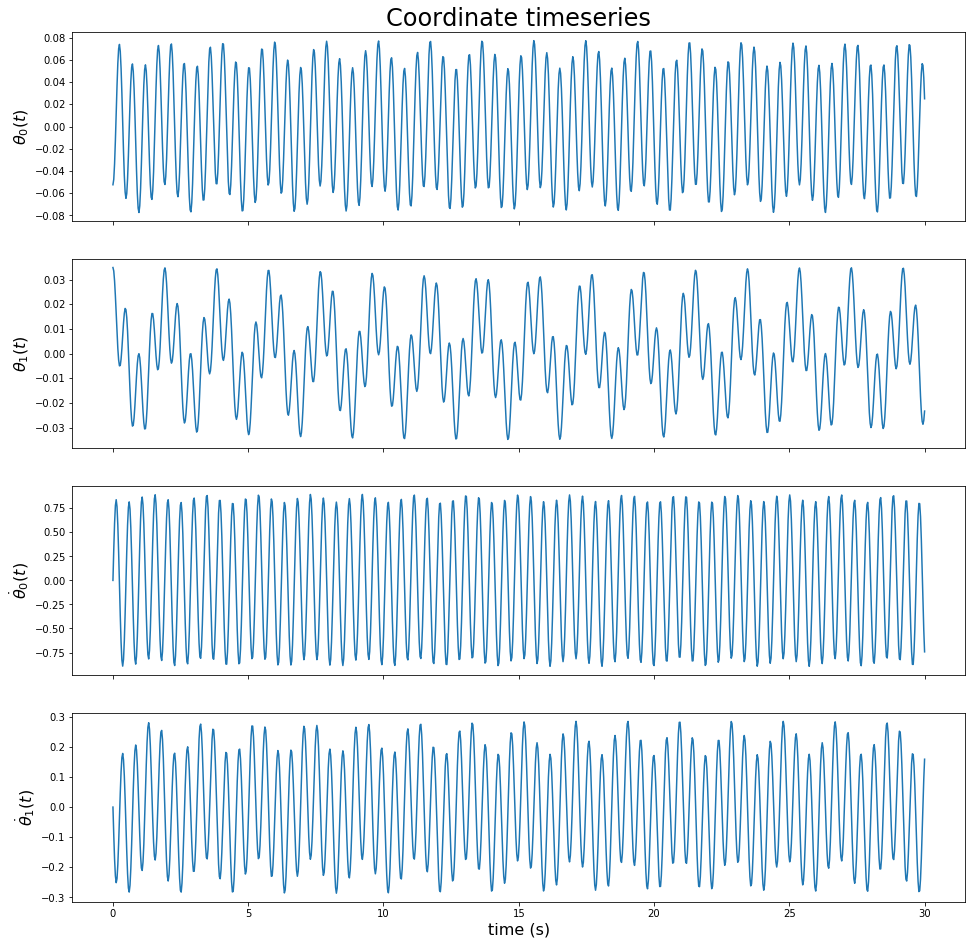

In [17]:
fig = double.time_series_plots()

Another way to display this information is by plotting a slice of the attractor in two of the phase space dimensions. The natural approach is to take a coordinate and its associated velocity, so that's what I've done here.

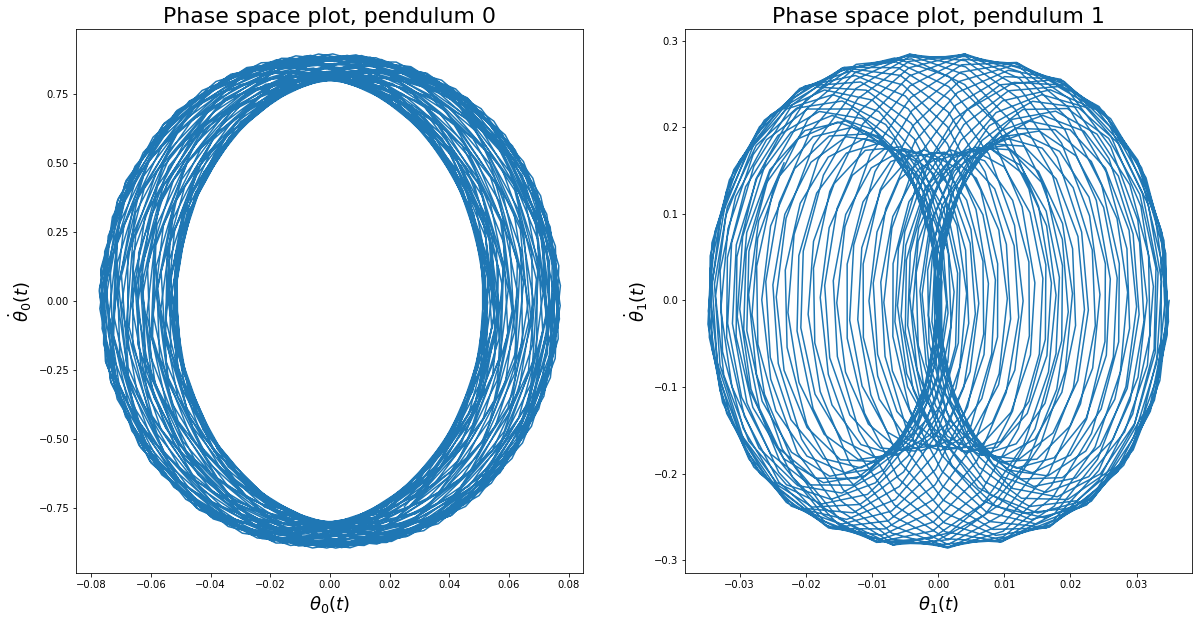

In [18]:
fig = double.phase_plots()

Both of these plotting routines can also show the time behavior of the linear eigenmodes, rather than the individual pendulums.

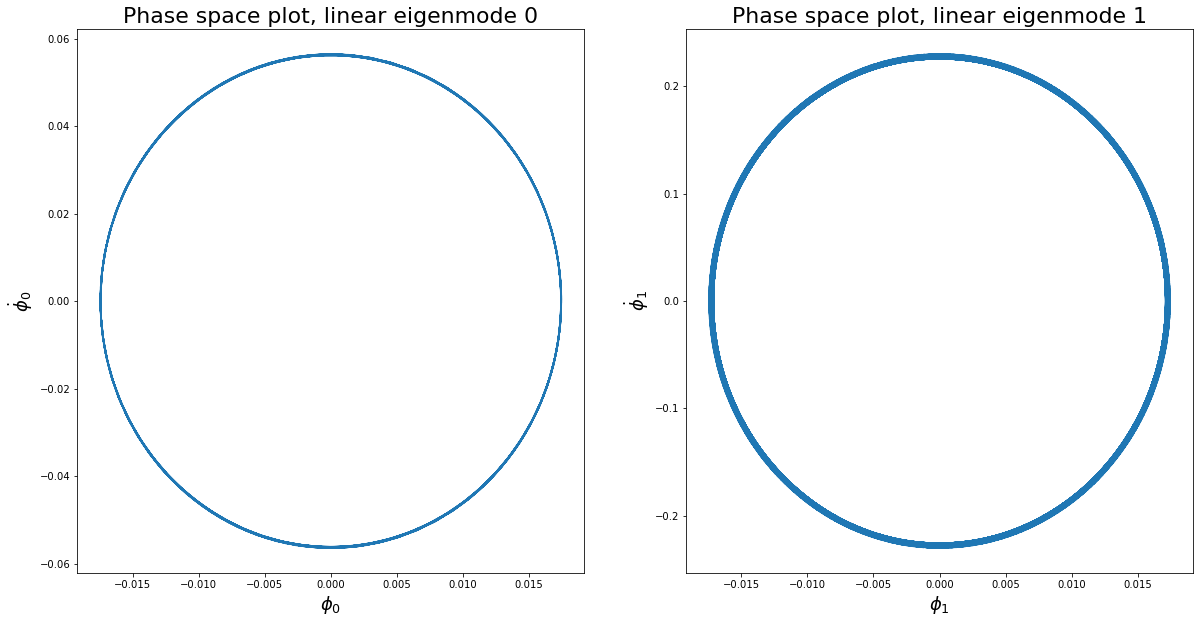

In [19]:
fig = double.phase_plots(eigenmodes=True)

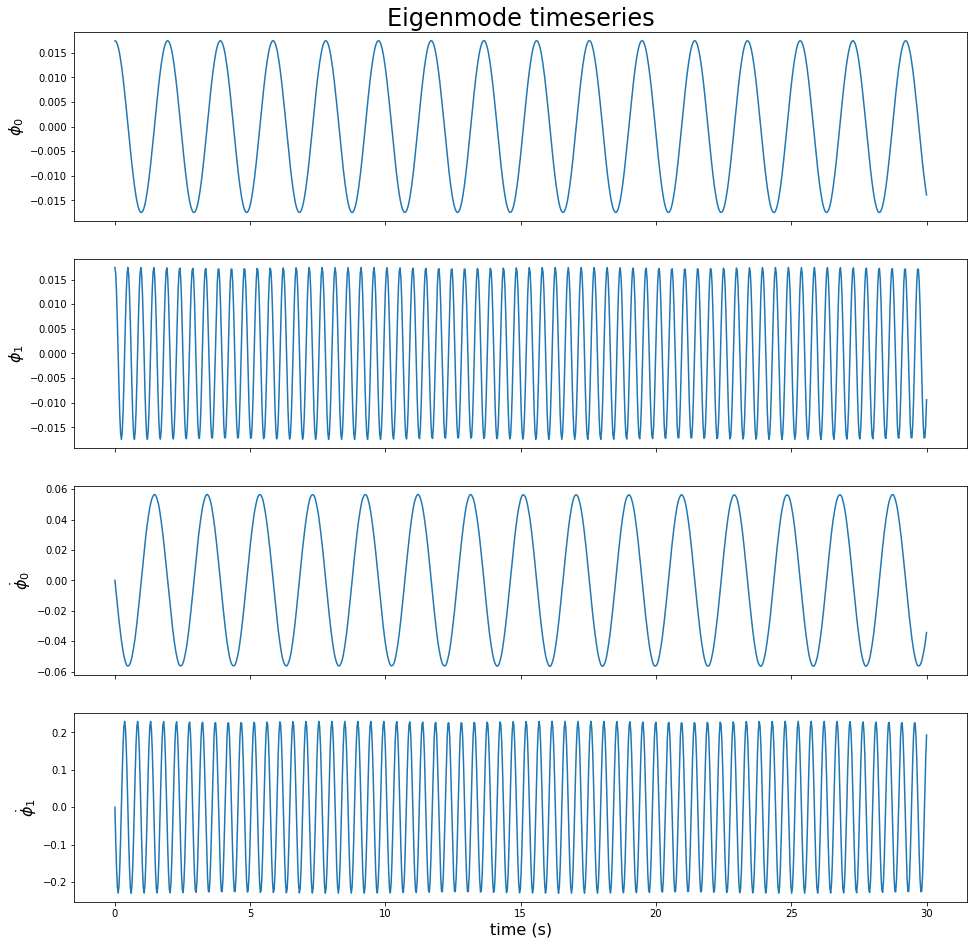

In [20]:
fig = double.time_series_plots(eigenmodes=True)

Lastly (for now) we also want to have more detailed information about the frequencies present in a particular time series. We get this information from a frequency power spectrum (the square magnitude of the FFT of the time series).

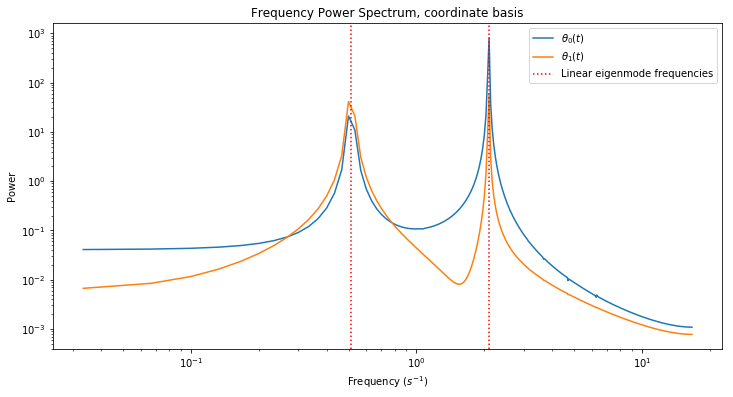

In [21]:
fig = double.powerspectrum()

Again, this also works for the projection onto the linear eigenmode basis.

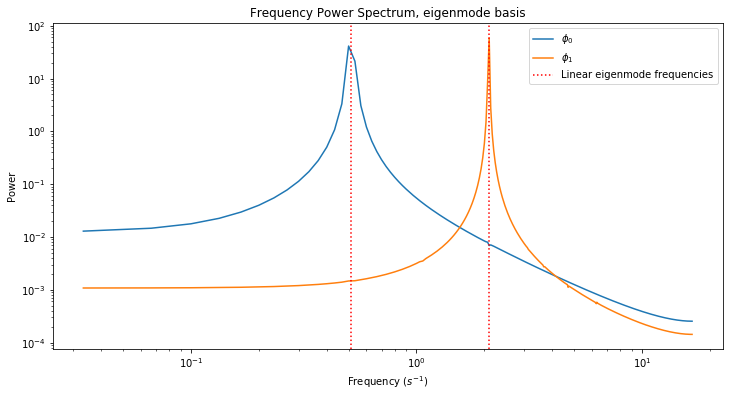

In [22]:
fig = double.powerspectrum(eigenmodes=True)

---

### Saving output
You will want to save output for presentations and to avoid duplicating effort. In the former case, you can get away with just saving pictures and animations, but in the latter case, you'll want to save the whole raw time series.  

#### Saving animations

The `anim` object has a method for writing to a file. It has a bewildering array of options. You should try to get away with using the defaults unless and until you make a movie with poor visual quality, at which time you can begin to tweak things.

In [23]:
# this will save tut-temp.mp4 in the same folder as this notebook
double.anim.save("tut-temp.mp4")

For reference, here is the docstring:

In [24]:
help(double.anim.save)

Help on method save in module matplotlib.animation:

save(filename, writer=None, fps=None, dpi=None, codec=None, bitrate=None, extra_args=None, metadata=None, extra_anim=None, savefig_kwargs=None) method of matplotlib.animation.FuncAnimation instance
    Saves a movie file by drawing every frame.
    
    Parameters
    ----------
    
    filename : str
        The output filename, e.g., :file:`mymovie.mp4`
    
    writer : :class:`MovieWriter` or str, optional
        A `MovieWriter` instance to use or a key that identifies a
        class to use, such as 'ffmpeg' or 'mencoder'. If `None`,
        defaults to ``rcParams['animation.writer']``
    
    fps : number, optional
       frames per second in the movie. Defaults to None,
       which will use the animation's specified interval to set
       the frames per second.
    
    dpi : number, optional
       Controls the dots per inch for the movie frames.  This
       combined with the figure's size in inches controls the size of


#### Saving figures

Figures can also be saved easily. All of the figure plotting methods return a figure object which has a `savefig` method. The only argument you need to supply is the file name.

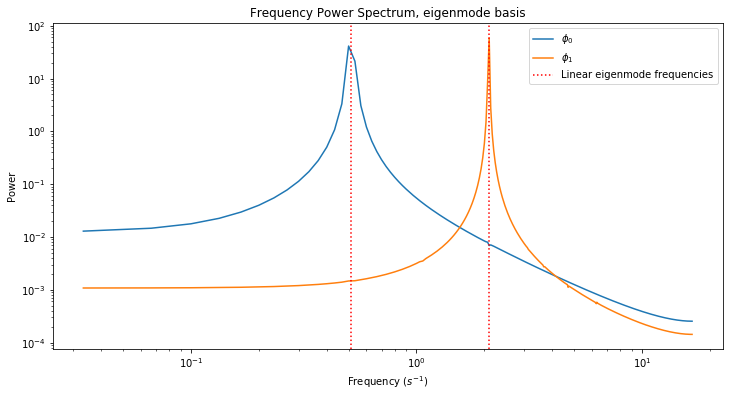

In [25]:
fig = double.powerspectrum(eigenmodes=True)

# should create 'tut-temp.png' in the folder containing this notebook.
fig.savefig('tut-temp.png')

There are, of course, other possible arguments.

In [26]:
help(fig.savefig)

Help on method savefig in module matplotlib.figure:

savefig(*args, **kwargs) method of matplotlib.figure.Figure instance
    Save the current figure.
    
    Call signature::
    
      savefig(fname, dpi=None, facecolor='w', edgecolor='w',
              orientation='portrait', papertype=None, format=None,
              transparent=False, bbox_inches=None, pad_inches=0.1,
              frameon=None)
    
    The output formats available depend on the backend being used.
    
    Arguments:
    
      *fname*:
        A string containing a path to a filename, or a Python
        file-like object, or possibly some backend-dependent object
        such as :class:`~matplotlib.backends.backend_pdf.PdfPages`.
    
        If *format* is *None* and *fname* is a string, the output
        format is deduced from the extension of the filename. If
        the filename has no extension, the value of the rc parameter
        ``savefig.format`` is used.
    
        If *fname* is not a string, rem

#### Saving raw data

In many cases, the data you generate with this model is pretty easy/quick to replicate; even with a million points in the time series, integrating the ODEs takes seconds rather than hours. We may get to a point, however, when that is not the case (if we move to larger numbers of links in the multipendulum, for example) and so it's useful to be able to save the results of a simulation for later analysis. We do that with the `serialize` method.

In [27]:
help(double.serialize)

Help on method serialize in module multipendulum.multipendulum:

serialize(filename='MultiPendulum.h5') method of multipendulum.multipendulum.MultiPendulum instance
    Write the integration results to an HDF5 archive.
    
    Parameters:
    -----------
    filename: string, optional
        gives the name of the HDF5 archive.



In [28]:
# will create tut-temp.h5 in the folder containing this notebook.
double.serialize("tut-temp.h5")

Since this functionality is mostly future-proofing at this point, I haven't yet written functions to extract data from the archive.

---

### The todo list
There are a number of things still to add to this multipendulum object:

1. **Energetics.** We don't yet have any diagnostics for measuring or plotting energies. We will need them.
2. **Nonlinear Normal Modes.** To connect this with previous work.
3. **Liapunov exponents.** If we're interested in chaos, this has to be here.
4. **Poincare sections.** Also.
5. **Unit tests.** Right now the code is simple enough that I'm relatively confident there are no major bugs, but there ought to be a test suite to verify this.
6. **Further annotations on plots.** There is some additional information which should be included on the plots.
7. **Refactoring.** The plotting functions should probably be moved into their own module within the package. This will change the API slightly
8. **Physical bells and whistles.** In particular, I'd like to add the ability to have damping and driving.